开始进行遗传算法
0 Best Fitness rate: 26894.587890625
 Average Fitness rate :28512.24609375
 worst Fitness rate:29471.25


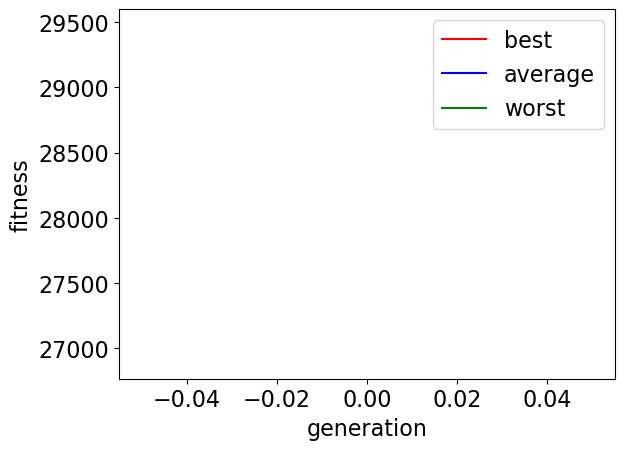

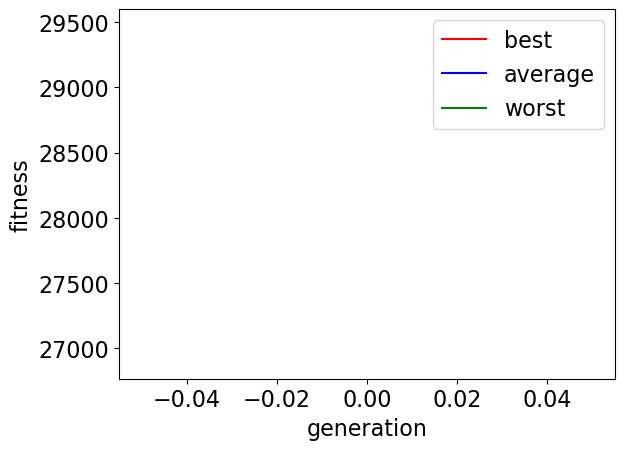

0 0.05
1 0.0497319041293007
2 0.04946524576651912
3 0.049200017203856514
4 0.04893621077484274
5 0.04867381885411461
6 0.048412833857195525
7 0.04815324824027622
8 0.04789505449999668
9 0.04763824517322934
10 0.04738281283686326
11 0.047128750107589636
12 0.04687604964168835
13 0.04662470413481571
14 0.04637470632179329
15 0.04612604897639797
16 0.04587872491115305
17 0.04563272697712046
18 0.04538804806369417
19 0.045144681098394604
20 0.044902619046664274
21 0.044661854911664384
22 0.044422381734072605
23 0.04418419259188194
24 0.04394728060020062
25 0.04371163891105306
26 0.04347726071318202
27 0.043244139231851594
28 0.04301226772865149
29 0.042781639501302204
30 0.04255224788346129


KeyboardInterrupt: 

In [1]:
'''环境说明
conda version :conda 23.5.0 
python version : python 3.11
用pytorch张量调用gpu加速计算
JupterLab
2024/3/16
'''

from PIL import Image,ImageDraw
import numpy as np
import random as r
import torch
import os
import matplotlib.pyplot as plt
import math
from torchvision.transforms import ToTensor

'''
    首先第一步因为要随机初始化三角形，要先对三角形进行定义
    三角形包括了颜色（RGB），透明度（alpha）,还有三个点的坐标
    （x_1,y_1),(x_2,y_2),(x_3,y_3)
    一个三角形有10维的属性值.
    对于颜色以及属性，可以对color类进行继承
'''

class Color:
    def __init__(self):
        self.r = r.randint(0, 255)
        self.g = r.randint(0, 255)
        self.b = r.randint(0, 255)
        self.a = r.randint(95, 115)
        
class triangle:
    max_mutate_rate = 0.08
    mid_mutate_rate = 0.3
    min_mutate_rate = 0.8
    def __init__(self,x=255,y=255): 
        self.img_triangle=None
        '''设置图片空间大小的默认参数256*256'''
        self.color=Color()
        '''继承Color类'''
        self.ax=r.randint(0,x)
        self.bx=r.randint(0,x)
        self.cx=r.randint(0,x)
        self.ay=r.randint(0,y)
        self.by=r.randint(0,y)
        self.cy=r.randint(0,y)
        
    def create_triangle(self,size=(256,256)):
        self.img_triangle=Image.new('RGBA',size)
        '''
            这里要调用PIL库的函数
            第一步是要先创建一个image实例，然后再在这个上面画图
            使用ImageDraw里面的Draw,实例化一个可以画三角形的ImageDraw实例
            可以理解为原先Image就像是电视机上的一张图片，然后ImageDraw实例
            化之后变成了画板就可以画图了，画三角形可以使用polygon函数，这个
            函数是画多边形的，详细看官方文档。
        '''
        sketchpad=ImageDraw.Draw(self.img_triangle)
        pts = [(self.ax, self.ay), (self.bx, self.by), (self.cx, self.cy)]  # 点坐标
        color = (self.color.r, self.color.g, self.color.b, self.color.a)
        sketchpad.polygon(pts,fill=color)#把坐标和颜色传进去
        return self.img_triangle
    def mutation_triangle(self, m_triangle):
        # 变异实际上是坐标点进行变化
        # 随机生成小数与变异率比较判断该坐标是否变异
        if mutate_or_not(self.max_mutate_rate):
            self.ax = r.randint(0, 255)
            self.ay = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.ax = min(max(0, m_triangle.ax + r.randint(-15, 15)), 255)
            self.ay = min(max(0, m_triangle.ay + r.randint(-15, 15)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.ax = min(max(0, m_triangle.ax + r.randint(-3, 3)), 255)
            self.ay = min(max(0, m_triangle.ay + r.randint(-3, 3)), 255)

        if mutate_or_not(self.max_mutate_rate):
            self.bx = r.randint(0, 255)
            self.by = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.bx = min(max(0, m_triangle.bx + r.randint(-15, 15)), 255)
            self.by = min(max(0, m_triangle.by + r.randint(-15, 15)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.bx = min(max(0, m_triangle.bx + r.randint(-3, 3)), 255)
            self.by = min(max(0, m_triangle.by + r.randint(-3, 3)), 255)

        if mutate_or_not(self.max_mutate_rate):
            self.cx = r.randint(0, 255)
            self.cy = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.cx = min(max(0, m_triangle.cx + r.randint(-15, 15)), 255)
            self.cy = min(max(0, m_triangle.cy + r.randint(-15, 15)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.cx = min(max(0, m_triangle.cx + r.randint(-3, 3)), 255)
            self.cy = min(max(0, m_triangle.cy + r.randint(-3, 3)), 255)
        # color
        if mutate_or_not(self.max_mutate_rate):
            self.color.r = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.color.r = min(max(0, m_triangle.color.r + r.randint(-30, 30)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.color.r = min(max(0, m_triangle.color.r + r.randint(-10, 10)), 255)

        if mutate_or_not(self.max_mutate_rate):
            self.color.g = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.color.g = min(max(0, m_triangle.color.g + r.randint(-30, 30)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.color.g = min(max(0, m_triangle.color.g + r.randint(-10, 10)), 255)

        if mutate_or_not(self.max_mutate_rate):
            self.color.b = r.randint(0, 255)
        if mutate_or_not(self.mid_mutate_rate):
            self.color.b = min(max(0, m_triangle.color.b + r.randint(-30, 30)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.color.b = min(max(0, m_triangle.color.b + r.randint(-10, 10)), 255)
        # alpha
        if mutate_or_not(self.mid_mutate_rate):
            self.color.a = r.randint(95, 115)
        if mutate_or_not(self.mid_mutate_rate):
            self.color.a = min(max(0, m_triangle.color.a + r.randint(-30, 30)), 255)
        if mutate_or_not(self.min_mutate_rate):
            self.color.a = min(max(0, m_triangle.color.a + r.randint(-10, 10)), 255)
def mutate_or_not(rate):
    '''
    生成随机数，判断是否需要变异
    '''
    return True if rate > r.uniform(0, 1) else False


def crossover_or_not(rate):
    """
    生成随机数，判断是否需要交换
    """
    return True if rate > r.uniform(0, 1) else False
class draw_triangles:
    '''一个个体里面有256个三角形（染色体），总共一个种群是有20个个体
    要能够画出来,那么要先进行生成三角形。
    '''
    mutate_rate = 0.01
    
    def __init__(self):
        self.triangles_list=[]
        '''生成一个列表来存储每个三角形的信息'''
        self.fitness = 0
        self.triangles_Img=None
        self.tri_tensor=None
        '''这个是用来存储最后combine之后生成的image的信息的'''

    def triangle_generate(self,num):
        for i in range(num):
            triangle_single=triangle()
            '''调用triangle类，生成单个三角形'''
            self.triangles_list.append(triangle_single)

            '''存到列表里面去'''
    def Imgcombine(self,size=(256,256)):
        '''把所有生成的三角形都整合到一张图片上面来'''
        '''先定义一下画板吧'''
        self.triangles_Img=Image.new('RGBA',size)
        draw=ImageDraw.Draw(self.triangles_Img)
        #draw.rectangle([0,0,256,256],fill=(255,255,255,255))#RGBA
        draw.polygon([(0, 0), (0, 255), (255, 255), (255, 0)], fill=(255, 255, 255, 255))
        '''
        这里用了rectangle函数,画出一个纯白色背景的画板。详细请看官方文档
        https://pillow-docs-cn.readthedocs.io/zh-cn/latest/reference/ImageDraw.html?highlight=imagedraw
        '''
        for triangle_s in self.triangles_list:
            self.triangles_Img = Image.alpha_composite(self.triangles_Img, triangle_s.img_triangle or triangle_s.create_triangle())
        '''这里的triangle就是每一个存在列表里的三角形实例,读取它的img属性，加到大图像中去'''
    
        #为了防止后续处理更麻烦，还是把变异交叉后的对图像的处理工作也放在这里了
        #原先我是单独写了一个类，后面觉得还是这样方便

#     def mutation(self,parent):
#         '''关于变异的概率这里做了一个改进，看之前那个代码是并没有实际上的对变异概率随代数增加而减少，开始的时候变异概率很低，所以
#             迭代要几千代至一万代左右，前期把变异概率设置为0.1，而不是0.0几甚至更低，考虑到大概在第300代的时候其实就已经能够收敛的
#             比较好了，所以我打算在指数函数里面选择。
#             方案一是：init_mutate_rate*e^(-x),x是目前的代数
#             方案二是：init_mutate_rate*e^(-x/final_epochs),final_epochs是人为自己设定的一个总迭代次数上限。
#             '''
        
#         for triangle_s in parent.triangles_list:
#             if mutate_or_not(self.mutate_rate):
#                 a = triangle()
#                 a.mutation_triangle(triangle_s)
#                 self.triangles_list.append(a)
#             else:
#                 self.triangles_list.append(triangle_s)
    
    def mutation(self,parent,p_rate):
        
        
        for triangle_s in parent.triangles_list:
            if mutate_or_not(p_rate):
                a = triangle()
                a.mutation_triangle(triangle_s)
                self.triangles_list.append(a)
            else:
                self.triangles_list.append(triangle_s)
                  
    '''均匀交叉'''               
    def uniform_cross(self, parent1, parent2, child):
        nums = len(parent1)
        for i in range(nums):
            if crossover_or_not(0.5):
                self.triangles_list.append(parent1[i])
                child.triangles_list.append(parent2[i])
            else:
                self.triangles_list.append(parent2[i])
                child.triangles_list.append(parent1[i])
    '''计算适应度'''
    def compute_fitness(self, img_tensor):  # 第二个参数是原图像四个通道矩阵
        transform = ToTensor()
        self.tri_tensor = transform(self.triangles_Img) 
        '''如果Img_array已经是PyTorch张量并已经格式化，只需要确认其数据类型为float'''
        img_tensor = img_tensor.float()
        '''需要使用GPU加速计算，将张量转移到GPU上'''
        if torch.cuda.is_available():
            self.tri_tensor = self.tri_tensor.to('cuda')
            img_tensor = img_tensor.to('cuda')
        #计算生成的图像RGBA通道与目标图像RGBA通道的平方差误
        self.fitness = torch.sum((self.tri_tensor[:3,:,] - img_tensor[:3]) ** 2).item()
    def saveImg(self, Path, i):  # 第2，3个参数分别是保存图像的路径，以及迭代次数
        self.triangles_Img.save(os.path.join(Path, "%d.png" % (i)))

class GA:
    '''
    包含了
    '''
    
    def __init__(self, size, imgPath, savePath, TriangleNums, epochs,rate):
        self.size = size
        self.img_triangle = Image.open(imgPath).resize(self.size).convert('RGBA')  # 读取原图 得到PIL.Image.Image
        transform = ToTensor()
        self.img_tensor = transform(self.img_triangle) 
        self.TriangleNums = TriangleNums  # 一张图片中三角形个数
        self.savePath = savePath  # 保存拟合图片的路径
        self.epochs = epochs  # 迭代单位次数
        self.p_rate =rate
    def Cross(self, parents):
        '''交叉操作是在个体之间进行的，比如说一个群体现在有20个个体，就是有20张img了，那交叉
        是在img之间进行的，这里的draw_triangles类就是代表一个个体，然后再从个体之间，有好多
        三角形是他们的基因，选取其中的三角形在个体之间随机交换，每次产生下一代的时候都是随机选择两个个体来
        '''
        l = 0
        childList = []
        for i in range(0, 20):  # 交叉
            j, k = r.sample(range(20), 2)
            '''从20个个体里面随机抽取两个出来，当作parent'''
            childList.append(draw_triangles())
            childList.append(draw_triangles())
            # 均匀交叉
            childList[l].uniform_cross(parents[k].triangles_list, parents[j].triangles_list, childList[l + 1])
            childList[l].Imgcombine()
            childList[l + 1].Imgcombine()
            childList[l].compute_fitness(self.img_tensor)
            childList[l + 1].compute_fitness(self.img_tensor)
            l += 2
        return childList
    # def Mutation(self,parent):
    #     """
    #     整个变异流程：
    #     """
    #     childList = []
    #     for i in range(20):
    #         childList.append(draw_triangles())
    #         childList[i].mutation(parent)
    #         childList[i].Imgcombine()
    #         childList[i].compute_fitness(self.img_tensor)
    #     return childList
    
    def Mutation(self,parent,p_rate):
        """
        整个变异流程：
        """
        childList = []
        for i in range(20):
            childList.append(draw_triangles())
            childList[i].mutation(parent,p_rate)
            childList[i].Imgcombine()
            childList[i].compute_fitness(self.img_tensor)
        return childList
#锦标赛法选择
    #def Tournament_selection(self, parents):      
        #childList = []
        #nums = len(parents)
        # 进行锦标赛选择 有放回抽样
        #while len(childList) <= 20:
            #i, j = r.sample(range(nums), 2)
            #if parents[i].fitness > parents[j].fitness:
                #childList.append(parents[j])
            #else:
                #childList.append(parents[i])
        #return childList   
    
    # 轮盘赌
    # def Roulette_Wheel_Selection(self,parents):
    #     select_prob=[]
    #     chlidList=[]
    #     nums=len(parents)
    #     '''
    #         得到父代所有个体的适应度之后，累加起来，得到一个总适应度
    #     '''
    #     sum_fitness=0
    #     for i in range(nums):
    #         sum_fitness+=parents[i].fitness
    #     '''计算每个个体的选择概率'''
    #     for i in range(nums):
    #         if i:
    #             select_prob.append(select_prob[-1]+parents[i].fitness/sum_fitness)
    #         else:
    #             select_prob.append(parents[i].fitness/sum_fitness)
    #     childList=[]
    #     while len(childList)<=20:
    #         rs=r.random()
    #         for i,sp in enumerate(select_prob):
    #             if rs<=sp:
    #                 childList.append(parents[i])
    #     '''加一个排序,方便后续处理'''
    #     childList.sort(key=lambda x: x.fitness, reverse=False)
    #     return childList

    def sort_selection(self, parents):
        '''
        确定性选择
        '''
        parents.sort(key=lambda x: x.fitness, reverse=False)
        return parents[:20]
    #绘制收敛曲线
    def Draw_convergence_curve(self, generation, generation_counts, fitness_3):
        # 每隔epochs代保存一次图片，输出适应度值，并绘制一次收敛曲线
        if generation_counts % self.epochs == 0:
            print(
                '{} Best Fitness rate: {}\n Average Fitness rate :{}\n worst Fitness rate:{}'.format(generation_counts,
                                                                                                     fitness_3[0][
                                                                                                         generation_counts],
                                                                                                     fitness_3[1][
                                                                                                         generation_counts],
                                                                                                     fitness_3[2][
                                                                                                         generation_counts]))
            if generation_counts % 1000 == 0:
                n = generation_counts - 980  # 让部分区域图像更清晰
                plt.rc('font', size=16)
                plt.plot(generation[n:], fitness_3[0][n:], 'r', label='best')  # 最好的个体的适应度
                plt.plot(generation[n:], fitness_3[1][n:], 'b', label='average')  # 中等的个体的适应度
                plt.plot(generation[n:], fitness_3[2][n:], 'g', label='worst')  # 最差的个体的适应度
                plt.xlabel(xlabel='generation')
                plt.ylabel(ylabel='fitness')
                plt.legend()
                plt.show()

            plt.rc('font', size=16)
            plt.plot(generation, fitness_3[0], 'r', label='best')  # 最好的个体的适应度
            plt.plot(generation, fitness_3[1], 'b', label='average')  # 中等的个体的适应度
            plt.plot(generation, fitness_3[2], 'g', label='worst')  # 最差的个体的适应度
            plt.xlabel(xlabel='generation')
            plt.ylabel(ylabel='fitness')
            plt.legend()
            plt.show()
    def model_fit(self):
        generation = []  # 种群代数，初始是第0代
        parents = []
        fitness_3 = [[], [], []]  # 每一代中最差，中等，最好的个体的适应度
        childList = []     
        for i in range(40):# 生成初代个体,随机产生40个个体
            parents.append(draw_triangles())  # 将Image_对象实例加入到种群列表中国
            parents[i].triangle_generate(TriangleNums)  # 第i个个体生成TriangleNums个三角形
            parents[i].Imgcombine()
            parents[i].compute_fitness(self.img_tensor)  # 将第i个个体 随机生成的多个三角形合成一个图像
            # 开始迭代
        for generation_counts in range(0, 30000):  # generation_counts迭代次数 初始为0
            '''确定选择的方法'''
            parents = self.sort_selection(parents)
            for i, j in [[0, 0], [1, 9], [2, 19]]:
                fitness_3[i].append(parents[j].fitness)
            parents_best = parents[0]
            parents_worst = parents[19]
            parents_avg = parents[9]           
            #用轮盘赌
            # parents = self.Roulette_Wheel_Selection(parents)
            # for i, j in [[0, 0], [1, 9], [2, 19]]:
            #     fitness_3[i].append(parents[j].fitness)
            # parents_best = parents[0]
            # parents_worst = parents[19]
            # parents_avg = parents[9]
            generation.append(generation_counts)  # 种群迭代次数
            # 绘制收敛曲线
            self.Draw_convergence_curve(generation, generation_counts, fitness_3)
            # 新生成的个体所组成的种群列表
            self.p_rate=0.05*math.exp(-generation_counts/186) if generation_counts<=300 else 0.01
            #186是算出来的,刚好让变异率递减曲线和最小变异率的直线衔接
            childList_crossover = self.Cross(parents)  # 交叉
            childList_mutation = self.Mutation(parents_best,self.p_rate)  # 最优个体变异
            parents.extend(childList_crossover)
            parents.extend(childList_mutation)
            del childList_mutation
            del childList_crossover
            if generation_counts % self.epochs == 0:
                parents_best.saveImg(self.savePath + str('\\best_p'), generation_counts)
                parents_worst.saveImg(self.savePath + str('\\worst_p'), generation_counts)
            print(generation_counts,self.p_rate)
'''global'''
# 原图路径
imgPath = r"火狐.png"
# 图片保存路径
SavePath = r".\img"
# 迭代单位次数
epochs = 100
# 一个个体中三角形个数 256
TriangleNums = 256
# 图片通道矩阵大小
size = (256, 256)
rate=0.1

if __name__ == '__main__':
    GA_Img = GA(size, imgPath, SavePath, TriangleNums, epochs,rate)
    print('开始进行遗传算法')
    GA_Img.model_fit()
            